<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 7b</span>
    <span>Date: 19/02/2025</span>
</h2>

<h2 style="text-align:center;">Support Vector Classification - Binary classification on Non-Linearly Separable Dataset</h2>

### <ins>**Aim:**</ins> To build a Support Vector Machine (SVM) classifier to separate two non-linearly separable classes and visualize the decision boundary, margins and support vectors.

### <ins>**Algorithm:**</ins>

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that maximizes the margin between different classes. The decision boundary is determined by support vectors, which are the data points closest to the margin.

The equation of the hyperplane is:
$$w^{T}x+b=0$$
Where:
- $w$ is the weight vector.
- $x$ is the input feature vector.
- $b$ is the bias term.

The decision function is given by:
$$f(x)=sign(w^{T}x+b)$$
where the class label is determined based on the sign of $f(x)$.
</br>
</br>
</br>
For non-linearly separable data, SVM uses a Radial Basis Function (RBF) kernel to map input features into a higher-dimensional space, where a linear separation is possible.

The decision function is given by:  
$$f(x) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i K(x_i, x) + b \right)$$
Where:
- $\alpha_i$ are the Lagrange multipliers,
- $K(x_i, x) = \exp(-\gamma ||x - x_i||^2)$ is the RBF kernel function,
- $ \gamma$ is a hyperparameter controlling the influence of each training point,
- $x_i$ are the support vectors,
- $b$ is the bias term.

Here, the decision boundary is non-linear and shaped based on kernel functions centered around support vectors. The RBF kernel allows SVM to classify data that is not linearly separable in the original input space.

Step 1: Import Libraries

- Import necessary Python libraries such as NumPy, Matplotlib, and modules from Scikit-Learn for SVM modeling, preprocessing, and evaluation.

Step 2: Generate Dataset

- Create a synthetic dataset consisting of two linearly separable classes using normal distribution.

- Assign class labels (0 and 1) to the generated points.

Step 3: Visualize the Dataset

- Plot the dataset to confirm linear separability before training the model.

Step 4: Split the Dataset

- Divide the dataset into training and testing sets using train_test_split from Scikit-Learn.

Step 5: Feature Scaling

- Normalize the feature values using StandardScaler to ensure SVM works optimally.

Step 6: Train the SVM Model

- Initialize the SVC model with a linear kernel and train it on the scaled dataset.

Step 7: Make Predictions

- Use the trained model to predict class labels on the test dataset.

Step 8: Evaluate the Model

- Compute performance metrics such as Accuracy Score, Confusion Matrix, Classification Report

Step 9: Visualize Decision Boundary

- Plot the decision boundary, margins, and support vectors to understand how SVM classifies data.

### Import the libraries

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Create the dataset

In [ ]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

### Visualize the dataset

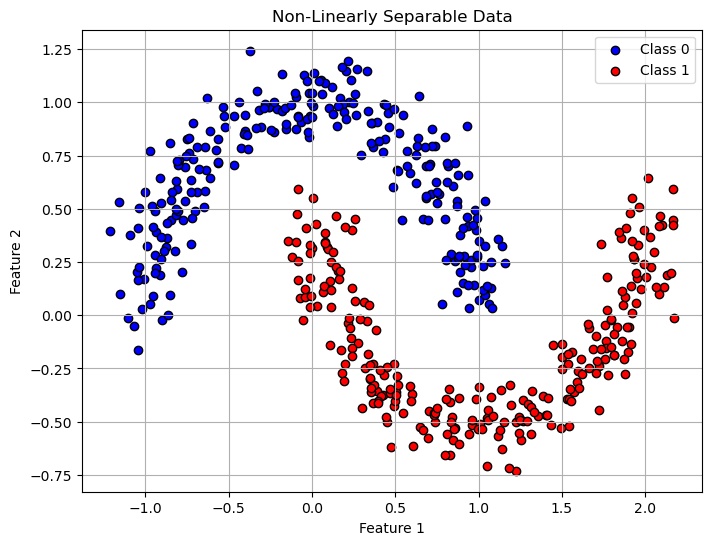

In [234]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

### Split dataset into train and test data

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale the data

In [236]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply SVM with Linear kernel

In [237]:
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [238]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

### Performance Metrics

In [239]:
y_pred_lin = svm_lin.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [240]:
print("Linear Kernel: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lin):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lin))
print("---"*20)
print("RBF Kernel: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

Linear Kernel: 
Accuracy: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.88      0.88      0.88        75

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

------------------------------------------------------------
RBF Kernel: 
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Visualize the decision boundary

In [241]:
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500))

In [242]:
Z = svm_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

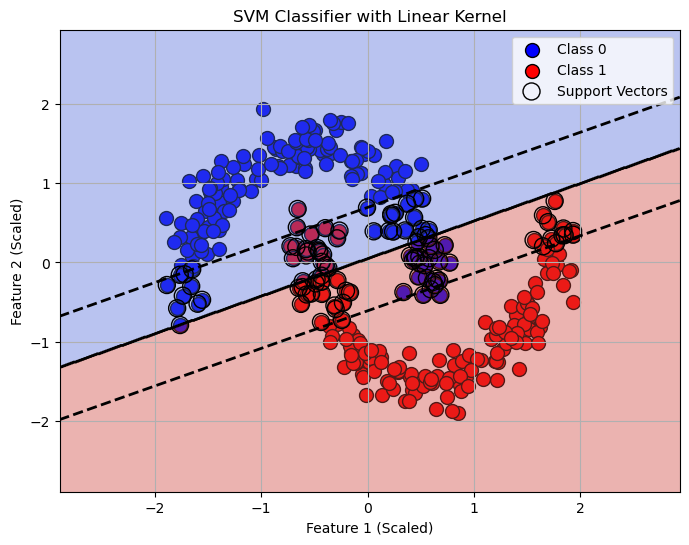

In [243]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], c='blue', label='Class 0', edgecolors='k', s=100)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], c='red', label='Class 1', edgecolors='k', s=100)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

Z_margin = svm_lin.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_margin = Z_margin.reshape(xx.shape)
plt.contour(xx, yy, Z_margin, levels=[-1, 1], colors='k', linestyles='--', linewidths=2)
plt.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM Classifier with Linear Kernel')
plt.legend()
plt.grid(True)
plt.show()

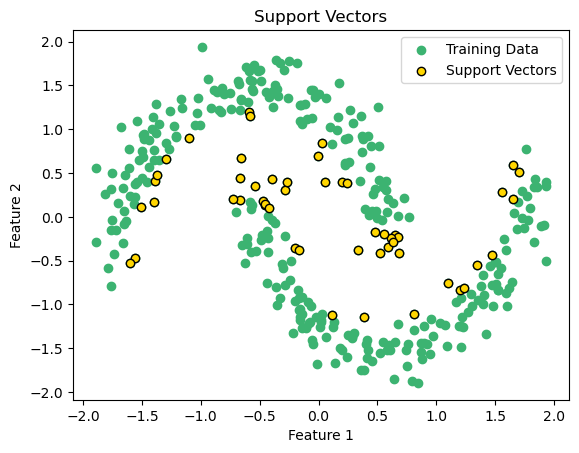

In [261]:
support_vectors = svm_rbf.support_vectors_

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='mediumseagreen', label='Training Data')  # Change training data color
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='gold', label='Support Vectors', edgecolors='black')  # Change support vector color

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Support Vectors')
plt.show()


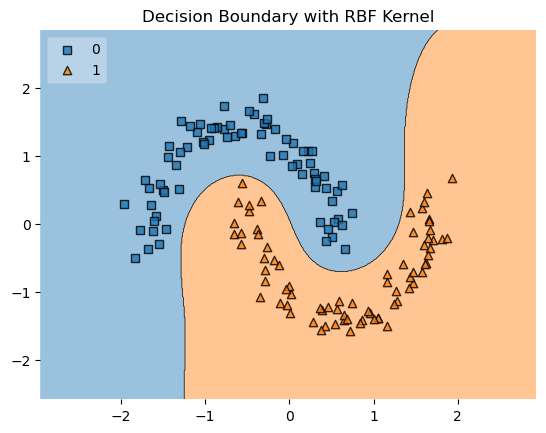

In [262]:
pdr(X_test_scaled, y_test, svm_rbf, legend=2)
plt.title('Decision Boundary with RBF Kernel')
plt.show()

### Result

A Support Vector Machine (SVM) classifier was successfully implemented to separate two non-linearly separable classes, and it is evident that for non-linearly separable data, the Gaussian Radial Basis Function is a better kernel than the Linear kernel.

---